In [6]:
import sys
from sklearn.ensemble import GradientBoostingClassifier
from mlpath import mlquest as mlq
import numpy as np
import pickle
sys.path.append('../../')
from DataPreparation.Ingestion.Ingestion import read_data, visualize_data
from DataPreparation.Preprocessing.Preprocessing import preprocess_data
from FeatureExtraction.Fractal.Fractal import apply_SFTA

In [7]:
mlq.start_quest('Fractal-GB', table_dest='../../')

/Users/essam/Documents/GitHub/MLPath/mlpath/mlquest/mlquest.py:66: UserWarning: Attempting to start a run while another one is active may cause data overwrite
  if mlquest.active == True: warnings.warn("Attempting to start a run while another one is active may cause data overwrite")


#### Ingestion

100%|██████████| 4/4 [00:00<00:00, 144.16it/s]


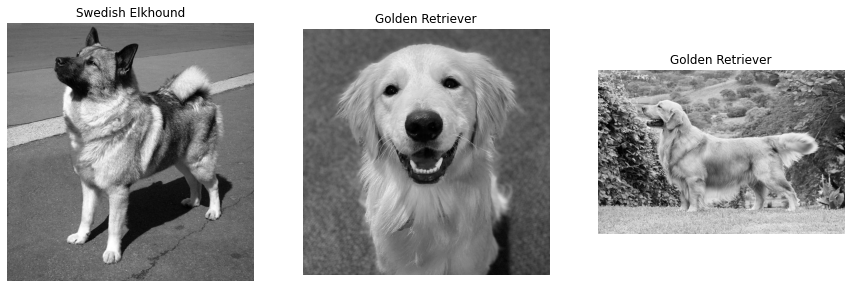

In [8]:
x_train_i, x_val_i, y_train_i, y_val_i = read_data()
visualize_data(x_train_i, y_train_i)

#### Preprocessing

In [9]:
x_train_p, x_val_p = preprocess_data(x_train_i, x_val_i)

#### Feature Extraction: Fractal Features

In [10]:
x_train_f, x_val_f = mlq.l(apply_SFTA)(x_train_p, x_val_p, deviation=20, saved=False)

#### Initiating the Model

In [11]:
model = mlq.l(GradientBoostingClassifier)(n_estimators=1, learning_rate=50, max_depth=3, random_state=0)

#### Training the model

In [12]:
model.fit(x_train_f, y_train_i)



GradientBoostingClassifier(learning_rate=50, n_estimators=1, random_state=0)

#### Save the model

In [13]:
# save the model with pickle
with open('../../Saved/ModelPipelines/GradientBoost/Fractal-GB.pkl', 'wb') as f:
    pickle.dump(model, f)

#### Validate the model

In [14]:
accuracy = model.score(x_val_f, y_val_i).item()
mlq.log_metrics(accuracy)

In [15]:
mlq.end_quest()

#### Show Logs

In [16]:
mlq.show_logs(quest_name='Fractal-GB', table_dest='../../', last_k=10)